##### Import primary libraries

In [109]:
# import primary libraries
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels as sm

In [110]:
%matplotlib inline
matplotlib.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,12)

##### Read both training and scoring datasets

In [111]:
# read csv datafile
dft = pd.read_csv("trainingData.csv")
dfs = pd.read_csv("scoringData.csv")

# check dimensions and column names
print("Training Data Matrix: ", len(dft.index), " x ", len(dft.columns))
print(dft.columns)

print("Scoring Data Matrix: ", len(dfs.index), " x ", len(dfs.columns))
print(dfs.columns)

Training Data Matrix:  166573  x  14
Index(['testindex', 'outcome', 'distance', 'visit_count', 'claims_daysaway',
       'tier', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
       'same_gender', 'same_language', 'same_address'],
      dtype='object')
Scoring Data Matrix:  71388  x  13
Index(['testindex', 'distance', 'visit_count', 'claims_daysaway', 'tier',
       'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
       'same_gender', 'same_language', 'same_address'],
      dtype='object')


In [112]:
# check datatypes in training data
dft.dtypes

testindex              int64
outcome                int64
distance             float64
visit_count            int64
claims_daysaway      float64
tier                 float64
fqhc                   int64
pcp_lookback           int64
family_assignment      int64
kid                    int64
is_ped                 int64
same_gender            int64
same_language          int64
same_address           int64
dtype: object

In [113]:
# Check summary
print(dft.describe())

           testindex        outcome       distance    visit_count  \
count  166573.000000  166573.000000  166573.000000  166573.000000   
mean   132132.292076       0.041081       2.818446       1.063732   
std     76283.631155       0.198478       5.636061       3.217193   
min         0.000000       0.000000       0.000000       0.000000   
25%     66079.000000       0.000000       0.474260       0.000000   
50%    132165.000000       0.000000       1.065102       0.000000   
75%    198149.000000       0.000000       2.227714       0.000000   
max    264282.000000       1.000000      50.000000     108.000000   

       claims_daysaway           tier           fqhc   pcp_lookback  \
count     29417.000000  166054.000000  166573.000000  166573.000000   
mean        140.967434       1.790068       0.187930       0.442449   
std         126.741228       0.971943       0.390657       0.496678   
min           0.000000       1.000000       0.000000       0.000000   
25%          49.000000 

In [114]:
# convert 'tier' to integer 
# first convert few missing values with 1 (mode)
dft['tier'] = dft['tier'].fillna(1).astype(int)

# copy the same pre-processing in scoring data
dfs['tier'] = dfs['tier'].fillna(1).astype(int)

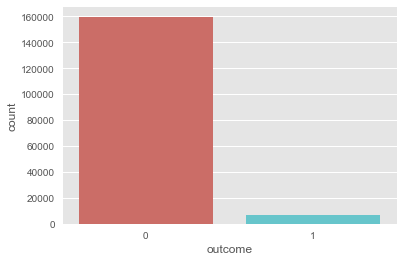

In [115]:
# Distribution of target
%matplotlib inline
dft['outcome'].value_counts()
sb.countplot(x='outcome', data=dft, palette='hls')
plt.show()
# plt.savefig('count_plot')

In [116]:
# Check % distribution
count_hd0 = len(dft[dft['outcome']==0])
count_hd1 = len(dft[dft['outcome']==1])
pct_hd0 = count_hd0/(count_hd0 + count_hd1)
print("percentage of no switch is: ", pct_hd0 * 100)
pct_hd1 = count_hd1/(count_hd0 + count_hd1)
print("percentage of switched is: ", pct_hd1 * 100)

percentage of no switch is:  95.8918912428785
percentage of switched is:  4.108108757121502


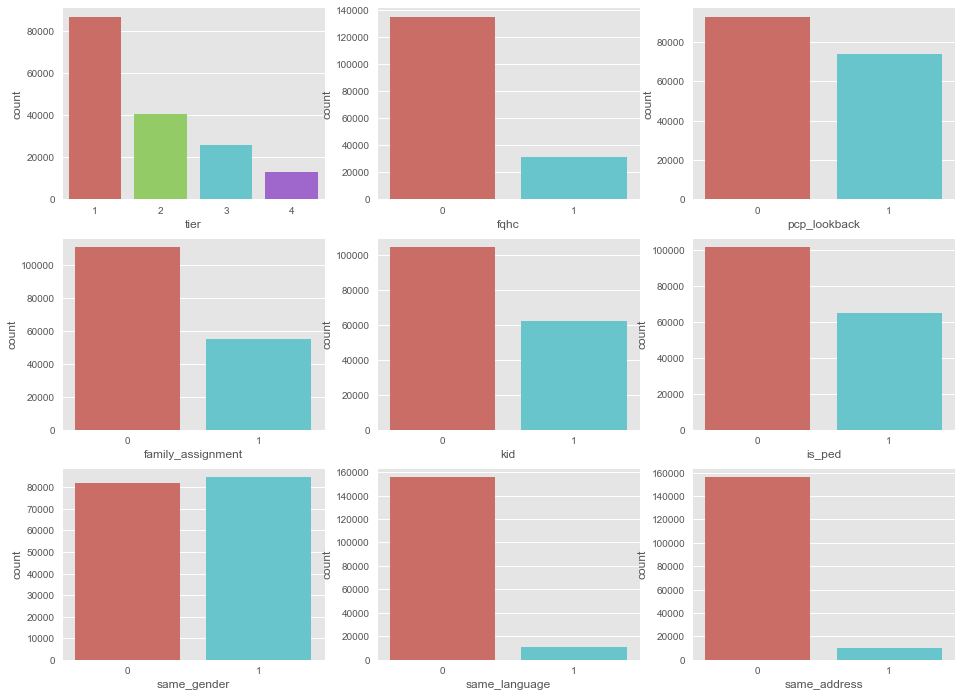

In [117]:
# Distribution of categorical variables
cat_vars  = ['tier', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
       'same_gender', 'same_language', 'same_address']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cat_vars:
    plt.subplot(3,3,j)
    dft[i].value_counts()
    ax=sb.countplot(x=i, data=dft, palette='hls')
    j=j+1

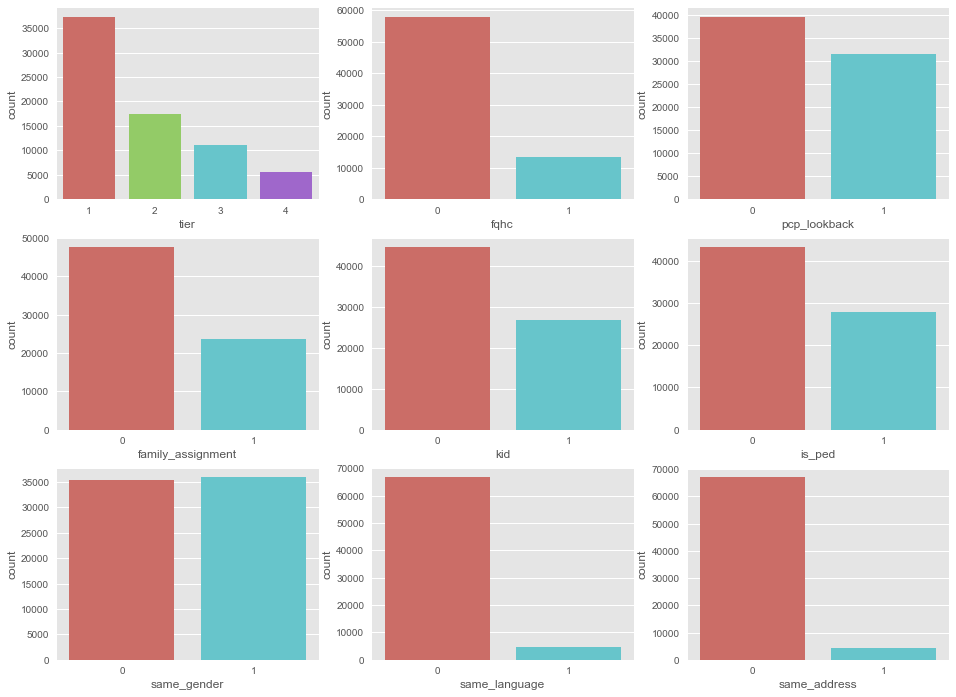

In [118]:
# Distribution of categorical variables in scoring data
cat_vars  = ['tier', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
       'same_gender', 'same_language', 'same_address']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cat_vars:
    plt.subplot(3,3,j)
    dfs[i].value_counts()
    ax=sb.countplot(x=i, data=dfs, palette='hls')
    j=j+1

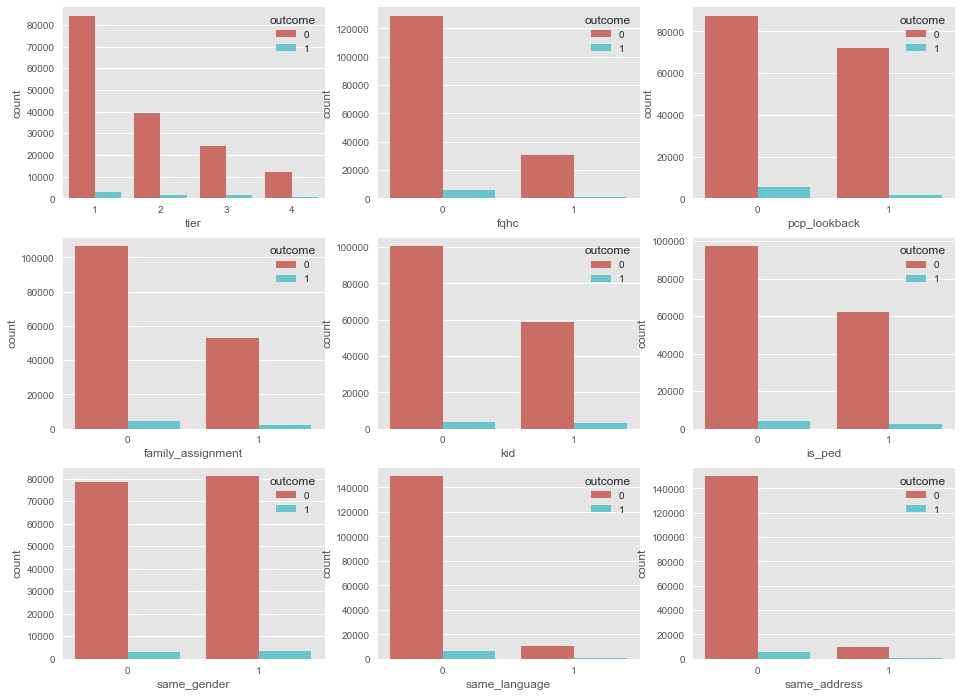

In [119]:
# Distribution of categorical variables by outcome
cat_vars  = ['tier', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
       'same_gender', 'same_language', 'same_address']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cat_vars:
    plt.subplot(3,3,j)
    dft[i].value_counts()
    ax=sb.countplot(x=i, hue='outcome', data=dft, palette='hls')
    j=j+1

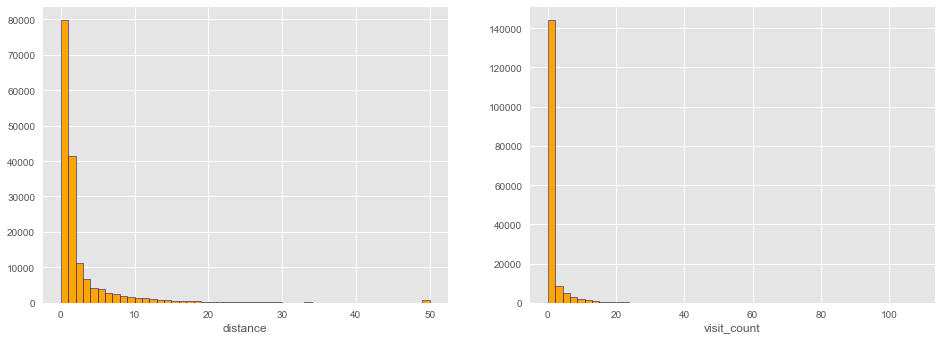

In [120]:
# Histogram of continuous variables
cnt_vars = ['distance', 'visit_count']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cnt_vars:
    ax=plt.subplot(2, 2, j)
    ax.hist(dft[i], bins = 50, color = 'orange', edgecolor = 'darkblue')
    ax.set_xlabel(i)
    j=j+1

In [121]:
# truncate the extreme values at the upper end
dft.loc[dft["distance"]>=30, "distance"]=30
dft.loc[dft["visit_count"]>=20, "visit_count"]=20

In [122]:
# copy the same processing for scoring data
dfs.loc[dfs["distance"]>=30, "distance"]=30
dfs.loc[dfs["visit_count"]>=20, "visit_count"]=20

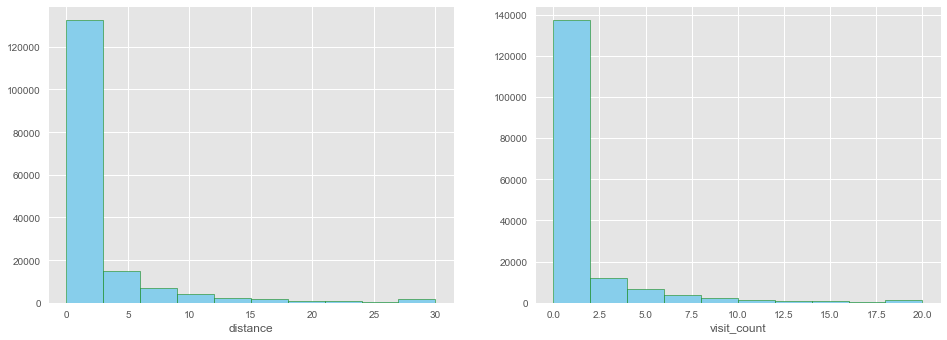

In [123]:
# Histogram of continuous variables after truncating
cnt_vars = ['distance', 'visit_count']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cnt_vars:
    ax=plt.subplot(2, 2, j)
    ax.hist(dft[i], bins = 10, color = 'skyblue', edgecolor = 'green')
    ax.set_xlabel(i)
    j=j+1

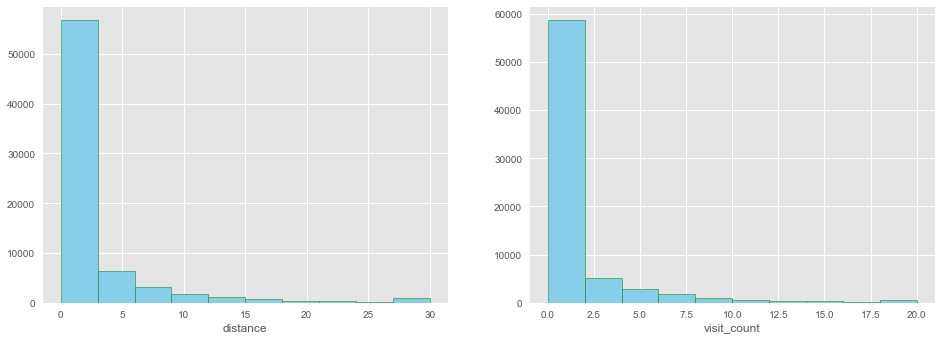

In [124]:
# Histogram of continuous variables (comparison in scoring data)
cnt_vars = ['distance', 'visit_count']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cnt_vars:
    ax=plt.subplot(2, 2, j)
    ax.hist(dfs[i], bins = 10, color = 'skyblue', edgecolor = 'green')
    ax.set_xlabel(i)
    j=j+1

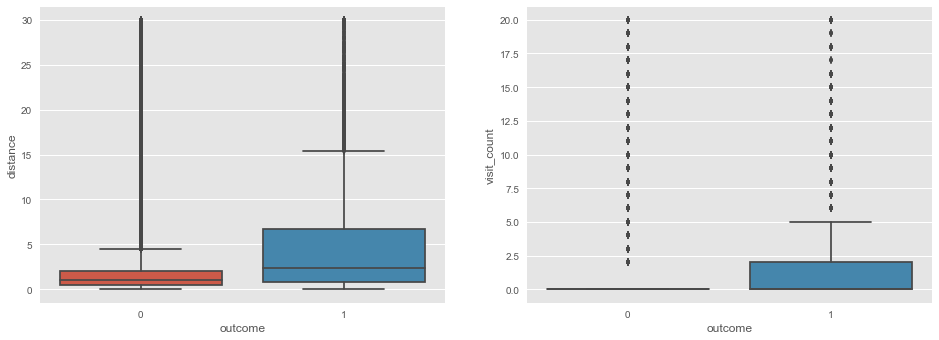

In [125]:
# Boxplot of continuous variables by outcome
cnt_vars = ['distance', 'visit_count']
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
j=1
for i in cnt_vars:
    plt.subplot(2,2,j)
    ax = sb.boxplot(x="outcome", y=i, data=dft)
    j=j+1

In [126]:
# Overlay histograms by outcome
dft1 = dft[dft["outcome"]==0]
dft2 = dft[dft["outcome"]==1]

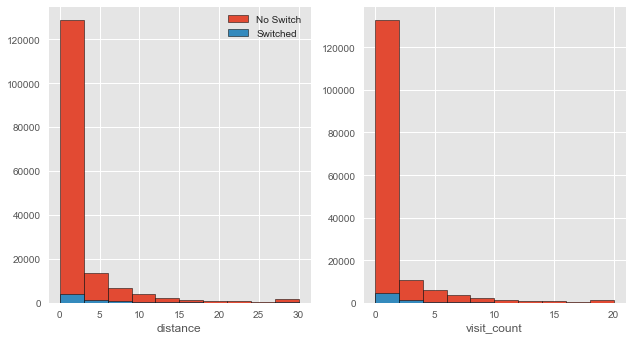

In [127]:
j=1
for i in cnt_vars:
    plt.legend(['No Switch', 'Switched'])
    ax=plt.subplot(2, 3, j)
    ax.hist(dft1[i], bins = 10, edgecolor='black')
    ax.hist(dft2[i], bins = 10, edgecolor='black')
    ax.set_xlabel(i)
    j=j+1

##### correlation analysis

In [128]:
corr_list = ['outcome', 'distance', 'visit_count', 'tier', 'fqhc', 'pcp_lookback', 'family_assignment',
             'kid', 'is_ped', 'same_gender', 'same_language', 'same_address']

In [129]:
# correlationship of each feature with outcome
my_list=[]
for i in corr_list:
    pearson_coef, p_value = stats.pearsonr(dft[i], dft["outcome"])
    my_list.append((i, pearson_coef, p_value))
#my_list

In [130]:
corr_with_num = pd.DataFrame(my_list).round(4)
corr_with_num.columns=["variable","corr_coef","p-value"]
corr_with_num

,variable,corr_coef,p-value
0,outcome,1.0000,0.0000
1,distance,0.1139,0.0000
2,visit_count,0.0436,0.0000
3,tier,0.0585,0.0000
4,fqhc,-0.0485,0.0000
5,pcp_lookback,-0.0894,0.0000
6,family_assignment,-0.0009,0.7216
7,kid,0.0380,0.0000
8,is_ped,-0.0007,0.7847
9,same_gender,0.0107,0.0000


In [131]:
# drop two variables that will not be part of model for matrix
dft = dft.drop(['testindex', 'claims_daysaway'], axis=1)

In [133]:
# plot scatter matrix
#pd.plotting.scatter_matrix(dft, figsize=(16, 16))
#plt.show()
# alternate method using seaborn pairplot 
#sb.pairplot(dft)

In [134]:
dft.corr()

,outcome,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
outcome,1.000000,0.113874,0.043647,0.058457,-0.048469,-0.089380,-0.000873,0.038035,-0.000669,0.010657,-0.007368,0.058566
distance,0.113874,1.000000,0.035436,0.076388,-0.070563,0.187506,0.009528,0.040116,0.018451,0.004520,-0.031380,0.007009
visit_count,0.043647,0.035436,1.000000,0.066660,-0.106676,0.270817,0.137590,0.101267,0.083761,0.010957,0.023540,0.033715
tier,0.058457,0.076388,0.066660,1.000000,-0.137823,0.091881,0.034731,0.007764,-0.009985,0.002109,-0.027961,0.031704
fqhc,-0.048469,-0.070563,-0.106676,-0.137823,1.000000,-0.139276,-0.078721,-0.014119,-0.010859,-0.000989,0.023137,0.011062
pcp_lookback,-0.089380,0.187506,0.270817,0.091881,-0.139276,1.000000,0.101946,0.091708,0.076544,0.011166,-0.017125,0.091560
family_assignment,-0.000873,0.009528,0.137590,0.034731,-0.078721,0.101946,1.000000,0.320826,0.306466,-0.003803,0.038860,0.003762
kid,0.038035,0.040116,0.101267,0.007764,-0.014119,0.091708,0.320826,1.000000,0.879399,-0.003208,0.020811,0.001709
is_ped,-0.000669,0.018451,0.083761,-0.009985,-0.010859,0.076544,0.306466,0.879399,1.000000,-0.001258,0.026625,-0.008664
same_gender,0.010657,0.004520,0.010957,0.002109,-0.000989,0.011166,-0.003803,-0.003208,-0.001258,1.000000,0.258806,0.005114


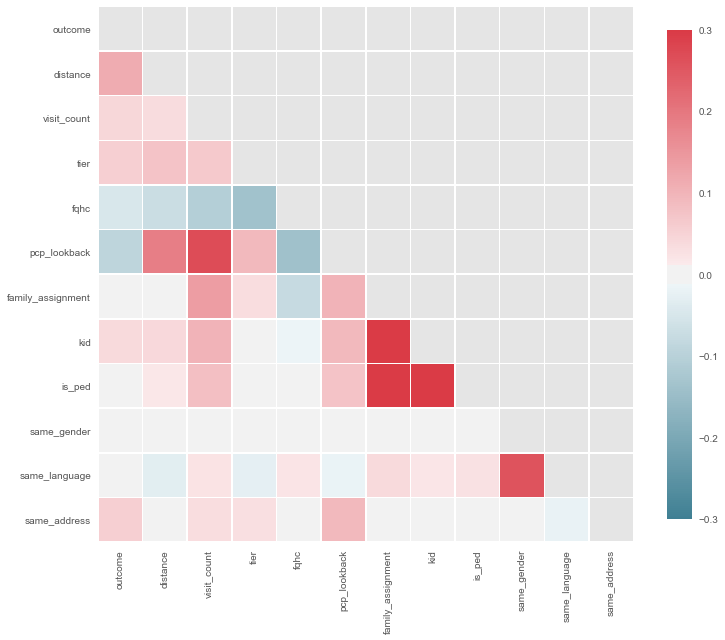

In [135]:
# Compute the correlation matrix
corr = dft.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [136]:
# Mean of input features with respect to target feature
dft.groupby('outcome').mean()

,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
outcome,,,,,,,,,,,
0,2.576252,1.002636,1.775853,0.191849,0.451637,0.331898,0.369254,0.390071,0.507719,0.065260,0.059813
1,5.287255,1.640655,2.061961,0.096449,0.227970,0.329826,0.461932,0.388426,0.534561,0.056116,0.131375


In [137]:
dft.groupby('outcome').std()

,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
outcome,,,,,,,,,,,
0,4.569878,2.891115,0.965571,0.393756,0.497657,0.470896,0.482604,0.487767,0.499942,0.246985,0.237142
1,6.999015,3.067004,1.063033,0.295227,0.419554,0.470184,0.498585,0.487428,0.498841,0.230162,0.337835


In [138]:
# separate input features and target data
Xdft = dft.loc[:, dft.columns != 'outcome']
ydft = dft.loc[:, dft.columns == 'outcome']

In [139]:
# Feature Importance using RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
model = RandomForestClassifier(n_estimators=100)
#model = ExtraTreesClassifier()
model.fit(Xdft, ydft.values.ravel())
print(model.feature_importances_)

[0.74948584 0.07036823 0.02975006 0.00842211 0.05480853 0.01227569
 0.02188806 0.02568272 0.01136954 0.00558    0.01036921]


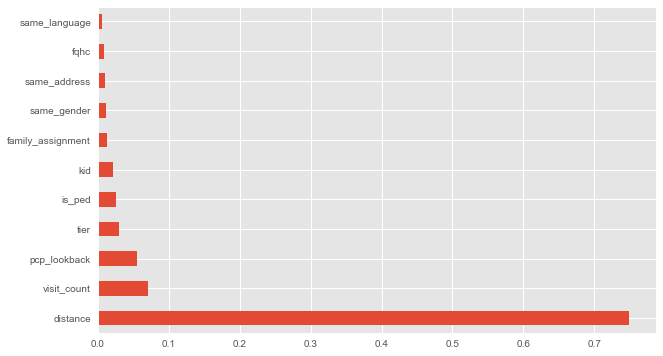

In [140]:
# plot the feature importance
%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,6)
(pd.Series(model.feature_importances_, index=Xdft.columns)
   .nlargest(13)
   .plot(kind='barh')) 

##### create dummy variables

In [141]:
# pd.__version__
cat_vars  = ["tier"]
dft_dum=dft
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dft_dum[var], prefix=var)
    dft1=dft_dum.join(cat_list)
    dft_dum=dft1
dft_dum.head()

,outcome,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address,tier_1,tier_2,tier_3,tier_4
0,0,0.071912,0,2,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0.448447,0,1,0,0,1,1,1,0,0,0,1,0,0,0
2,0,0.345793,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3,0,1.857032,0,1,0,0,1,1,1,1,0,0,1,0,0,0
4,1,7.222060,0,1,0,0,1,1,0,0,0,0,1,0,0,0


In [142]:
# drop original variables after creating the dummies
data_vars=dft_dum.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
dft1=dft_dum[to_keep]
dft1.columns.values

array(['outcome', 'distance', 'visit_count', 'fqhc', 'pcp_lookback',
       'family_assignment', 'kid', 'is_ped', 'same_gender',
       'same_language', 'same_address', 'tier_1', 'tier_2', 'tier_3',
       'tier_4'], dtype=object)

In [143]:
# drop_first=True did not work for reason, drop them manually
data_vars=dft1.columns.values.tolist()
drop_vars = ['tier_1']
to_keep=[i for i in data_vars if i not in drop_vars]
dft1=dft1[to_keep]
dft1.columns.values

array(['outcome', 'distance', 'visit_count', 'fqhc', 'pcp_lookback',
       'family_assignment', 'kid', 'is_ped', 'same_gender',
       'same_language', 'same_address', 'tier_2', 'tier_3', 'tier_4'],
      dtype=object)

In [144]:
# create dummies in scoring data as well
cat_vars  = ["tier"]
dfs_dum=dfs
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dfs_dum[var], prefix=var)
    dfs1=dfs_dum.join(cat_list)
    dfs_dum=dfs1

##### Normalize data

In [180]:
# separate input features and target data
dft_X = dft1.loc[:, dft1.columns != 'outcome']
dft_y = dft1.loc[:, dft1.columns == 'outcome']

In [195]:
from sklearn import preprocessing
# norm_minmax = preprocessing.MinMaxScaler()
norm_std = preprocessing.StandardScaler()

# Fit only to the training data
#norm_minmax.fit(dft_X)
norm_std.fit(dft_X)


C:\Users\gbhatt1\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [196]:
# Now apply the transformations to the data

# transform training data
xt = dft_X.values #returns a numpy array
xt_scaled = norm_std.transform(xs)
dftn_X = pd.DataFrame(xt_scaled, columns=dft_X.columns)

# transform scoring data
cols = ['distance', 'visit_count', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
          'same_gender', 'same_language', 'same_address', 'tier_2', 'tier_3', 'tier_4']
dfs_X = dfs_dum[cols]
xs = dfs_X.values #returns a numpy array
xs_scaled = norm_std.transform(xs)
dfsn_X = pd.DataFrame(xs_scaled, columns=dfs_X.columns)

In [198]:
print(dftn_X.columns)

Index(['distance', 'visit_count', 'fqhc', 'pcp_lookback', 'family_assignment',
       'kid', 'is_ped', 'same_gender', 'same_language', 'same_address',
       'tier_2', 'tier_3', 'tier_4'],
      dtype='object')


#### Feature engineering

##### Oversampling using SMOTE

In [199]:
# oversample minority data during train/test split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(dftn_X, dftn_y, test_size=0.3, random_state=0)

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.values.ravel())

##### grid search for lamda (lasso logistic regression using full data)

(0.0001, 0.31622776601683794)

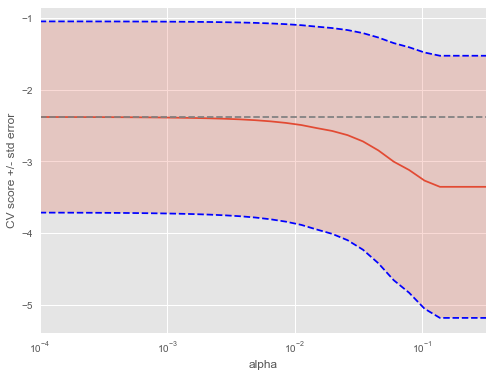

In [200]:
# code source: https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

# this part uses full training data without train/test split
sm = SMOTE(random_state=2)
X, y = sm.fit_sample(dftn_X, dftn_y.values.ravel())

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [201]:
# score the error rate using the above lamda on train/test split
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
train_score0001=lasso0001.score(X_train,y_train)
test_score0001=lasso0001.score(X_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print ("training score for alpha=0.0001:", train_score0001 )
print ("test score for alpha =0.0001: ", test_score0001)
print ("number of features used: for alpha =0.0001:", coeff_used0001)

training score: 0.0
test score:  -5.316509262738544
number of features used:  0
training score for alpha=0.0001: 0.19682313518063954
test score for alpha =0.0001:  -3.9289890895244977
number of features used: for alpha =0.0001: 13


##### Lasso logistic regression

In [202]:
log = LogisticRegression(penalty='l2', solver='lbfgs')
log.fit(dftn_X, dftn_y.values.ravel())
thetaLasso=log.coef_
print("Lasso output:\n",thetaLasso.reshape(13,1))

Lasso output:
 [[ 0.41889388]
 [ 0.29454851]
 [-0.31009464]
 [-0.90279266]
 [-0.06887529]
 [ 0.85142507]
 [-0.73484495]
 [ 0.06320781]
 [-0.03492103]
 [ 0.26598214]
 [ 0.06493635]
 [ 0.21519842]
 [ 0.15397638]]


##### Tree Classifier Selection

In [203]:
# Feature Importance using RandomForestClassifier (alternate is ExtraTreesClassifier)
from sklearn import metrics

# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

model.fit(dftn_X, dftn_y.values.ravel())
print(model.feature_importances_)

[0.74889874 0.07412637 0.00836045 0.05961944 0.01185326 0.02001487
 0.02562835 0.0117599  0.00578123 0.01023338 0.009449   0.00765806
 0.00661695]


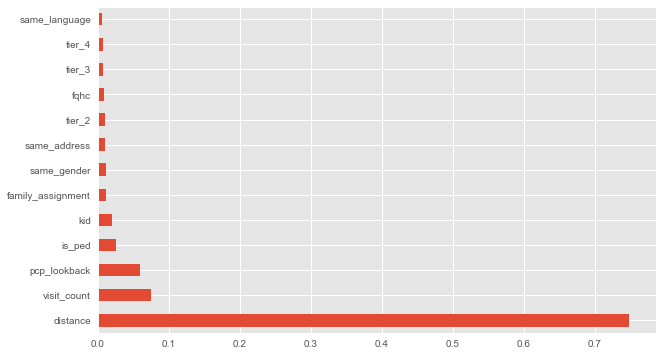

In [204]:
# plot the feature importance
%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,6)
(pd.Series(model.feature_importances_, index=dftn_X.columns)
   .nlargest(13)
   .plot(kind='barh')) 

##### Recursive feature extraction (logistic regression)

In [205]:
# create the RFE model and select top K attributes

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 1)
rfe = rfe.fit(dftn_X, dftn_y.values.ravel())

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False False
 False]
[ 4  6  5  3 10  1  2 12 13  7 11  8  9]


##### Final data

In [206]:
# keep selected list of features from both methods ("same_language" is not selected)
cols = ['distance', 'visit_count', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
        'same_gender', 'same_language', 'same_address', 'tier_2', 'tier_3', 'tier_4']
colx = ['distance', 'visit_count', 'fqhc', 'pcp_lookback', 'family_assignment', 'kid', 'is_ped',
        'same_gender', 'same_address', 'tier_2', 'tier_3', 'tier_4'] # drop same language

In [207]:
#dfint_X = dftn_X[cols]
dfint_X = dftn_X[colx]
dfint_y = dftn_y

In [208]:
# repeat oversampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(dfint_X, dfint_y, test_size=0.3, random_state=0)

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.values.ravel())

In [209]:
# scikit-learn metrics for model performance for binary classifiers
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Logistic Regression

In [210]:
# simple logistic regression with statsmodel
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.599477
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: y                Pseudo R-squared: 0.135      
Date:               2019-04-25 16:58 AIC:              268160.5690
No. Observations:   223642           BIC:              268284.3827
Df Model:           11               Log-Likelihood:   -1.3407e+05
Df Residuals:       223630           LL-Null:          -1.5502e+05
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.3898     0.0048     80.8289   0.0000    0.3803    0.3992
x2        0.2771     0.0052     53.3473   0.0000    0.2669    0.2873
x3       -0.2591     0.0052    -49.6468   0

In [211]:
# logistic regression model fitting
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [212]:
# predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
lgr_accuracy=logreg.score(X_test, y_test)
print('Accuracy of LR classifier on test set: {:.3f}'.format(lgr_accuracy))

Accuracy of LR classifier on test set: 0.708


In [213]:
# ROC curve (calculation and visualization)
lgr_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print('AUC of LR classifier on test set: {:.3f}'.format(lgr_roc_auc))

AUC of LR classifier on test set: 0.700


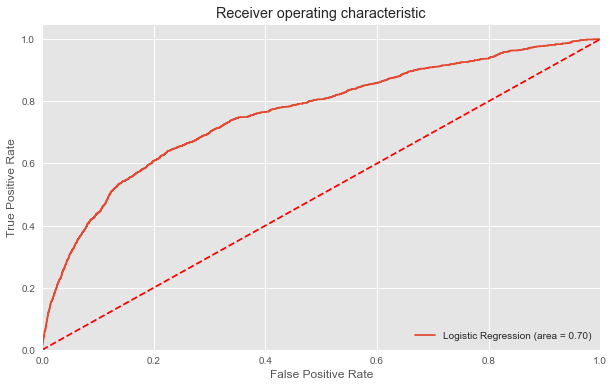

In [214]:
# display roc curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lgr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Artificial Neural Network

In [215]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [216]:
# predict and calculate accuracy
y_pred = mlp.predict(X_test)
mlp_accuracy = mlp.score(X_test, y_test)
print('Accuracy of ANN classifier on test set: {:.3f}'.format(mlp_accuracy))

Accuracy of ANN classifier on test set: 0.821


In [217]:
# ROC curve (calculation only)
mlp_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
print('AUC of MLP classifier on test set: {:.3f}'.format(mlp_roc_auc))

AUC of MLP classifier on test set: 0.738


##### Classification and regression tree

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
crt_classifier = DecisionTreeClassifier(criterion = "gini", 
                                        random_state = 100, max_depth=3, min_samples_leaf=5)
#cartclassifier = DecisionTreeClassifier(criterion = "entropy", 
#                                       random_state = 100, max_depth=3, min_samples_leaf=5)
crt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [219]:
# predict and calculate accuracy
y_pred = crt_classifier.predict(X_test)
crt_accuracy = crt_classifier.score(X_test, y_test)
print('Accuracy of CART classifier on test set: {:.3f}'.format(crt_accuracy))

Accuracy of CART classifier on test set: 0.860


In [220]:
# ROC curve (calculation only)
crt_roc_auc = roc_auc_score(y_test, crt_classifier.predict(X_test))
print('AUC of CART classifier on test set: {:.3f}'.format(crt_roc_auc))

AUC of CART classifier on test set: 0.733


In [221]:
print('SUMMARY OF ACCURACY RESULT ON TEST SET')
print()
print('Logistic Regression Classifier')
print('  Accuracy      : {:.3f}'.format(lgr_accuracy))
print('  ROC-AUC       : {:.3f}'.format(lgr_roc_auc))
print()
print('Artificial Neural Network')
print('  Accuracy      : {:.3f}'.format(mlp_accuracy))
print('  ROC-AUC       : {:.3f}'.format(mlp_roc_auc))
print()
print('Decision Tree Classifier')
print('  Accuracy      : {:.3f}'.format(crt_accuracy))
print('  ROC-AUC       : {:.3f}'.format(crt_roc_auc))

SUMMARY OF ACCURACY RESULT ON TEST SET

Logistic Regression Classifier
  Accuracy      : 0.708
  ROC-AUC       : 0.700

Artificial Neural Network
  Accuracy      : 0.821
  ROC-AUC       : 0.738

Decision Tree Classifier
  Accuracy      : 0.860
  ROC-AUC       : 0.733


##### Score the scoring data

In [222]:
dfsn_X.shape

(71388, 13)

In [223]:
dfins_X = dfsn_X[colx]

In [224]:
# predict using the best model
# ANN : MLP
dfsn_scr = mlp.predict(dfins_X)
print(dfsn_scr)

[0 1 1 ... 0 0 1]


In [225]:
df_l = pd.DataFrame(dfsn_scr, columns=['Predicted']) 
df_a = pd.DataFrame(dfs)
dfx = pd.concat([df_l, df_a], axis=1)
dfx.head()

,Predicted,testindex,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
0,0,1,0.245254,0,NaN,1,1,0,0,1,1,1,0,0
1,1,3,2.200397,0,NaN,3,0,0,1,1,1,0,0,0
2,1,4,6.542807,0,NaN,2,0,0,0,0,0,0,0,0
3,0,8,0.094251,0,NaN,1,1,0,1,0,0,1,0,0
4,0,20,0.521691,0,NaN,3,0,0,1,1,1,0,0,0


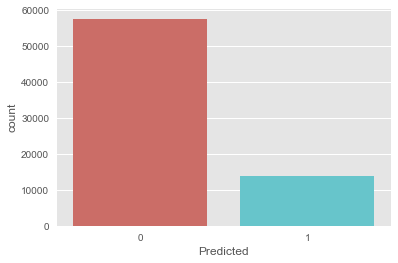

In [226]:
%matplotlib inline
dfx['Predicted'].value_counts()
sb.countplot(x='Predicted', data=dfx, palette='hls')
plt.show()

In [227]:
# Check % distribution
count_hd0 = len(dfx[dfx['Predicted']==0])
count_hd1 = len(dfx[dfx['Predicted']==1])
pct_hd0 = count_hd0/(count_hd0 + count_hd1)
print("percentage of no switch is: ", pct_hd0 * 100)
pct_hd1 = count_hd1/(count_hd0 + count_hd1)
print("percentage of switched is: ", pct_hd1 * 100)

percentage of no switch is:  80.6452064772791
percentage of switched is:  19.354793522720907


In [228]:
dfx.to_csv("scored_info.csv", encoding='utf-8', index=False)

In [229]:
dfx.shape

(71388, 14)